In [502]:
DATA_FILE ='../data/transportation-railroad-casualties.csv'

In [503]:
####################################################
# Boilerplate import/setup code for general analysis
####################################################

import datetime as dt
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Useful colors to reference
SNS_BLUE, SNS_GREEN, SNS_RED, SNS_PURPLE, SNS_YELLOW, SNS_CYAN = sns.color_palette()
# sns.set_palette(sns.color_palette("cubehelix", 8))
pd.set_option('display.max_columns', 500)
plt.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

####################################################
# everett@bayesimpact.org
####################################################

In [504]:
# Helpers (currently cut and paste around different notebooks... oops)

def percentify_axis(ax, which):
    which = which.lower()
    if which in ('x', 'both'):
        ax.set_xticklabels(['%.0f%%' % (t*100) for t in ax.get_xticks()])
    if which in ('y', 'both'):
        ax.set_yticklabels(['%.0f%%' % (t*100) for t in ax.get_yticks()])

color_idx = 0
CYCLE_COLORS = sns.color_palette()
def next_color():
    global color_idx
    c = CYCLE_COLORS[color_idx] 
    color_idx = (color_idx + 1) % len(CYCLE_COLORS)
    return c

def count_unique(s):
    values = s.unique()
    return sum(1 for v in values if pd.notnull(v))

def missing_pct(s):
    missing = N - s.count()
    return missing * 100.0 / N

def complete_pct(s):
    return 100 - missing_pct(s)

def summarize_completeness_uniqueness(df):
    print '*** How complete is each feature? How many different values does it have? ***'
    rows = []
    for col in df.columns:
        rows.append([col, '%.0f%%' % complete_pct(df[col]), count_unique(df[col])])
    return pd.DataFrame(rows, columns=['Column Name', 'Complete (%)','Unique Values'])

def summarize_completeness_over_time(df, time_col, transpose=True):
    print '*** Data completeness over time per column ***'
    x = df.groupby(time_col).count()
    x = x.div(df.groupby(time_col).size(), axis=0)
    for col in x.columns:
        x[col] = x[col].apply(lambda value: '%.0f%%' % (value * 100))
    if transpose:
        return x.T
    return x

def plot_top_hist(df, col, top_n=10, skip_below=.01):
    '''Plot a histogram of a categorical dataframe column, limiting to the most popular.'''
    counts = df[col].value_counts(True, ascending=True)
    missing = missing_pct(df[col])
    if counts.max() < (skip_below / (1 - missing)):
        print 'Skipping "%s" histogram -- most common value is < %.0f%% of all cases' % (col, skip_below*100)
        return
    fig, ax = plt.subplots(1)
    explanation = ''
    if len(counts) > top_n:
        explanation = ' (top %d of %d)' % (top_n, len(counts))
        counts = counts.iloc[-top_n:]
    explanation += ' -- %.0f%% missing' % (missing)
    counts.plot(kind='barh', ax=ax, color=next_color())
    ax.set_title('Rows by "%s"%s' % (col, explanation))
    ax.set_xticklabels(['%.0f%%' % (t*100) for t in ax.get_xticks()])


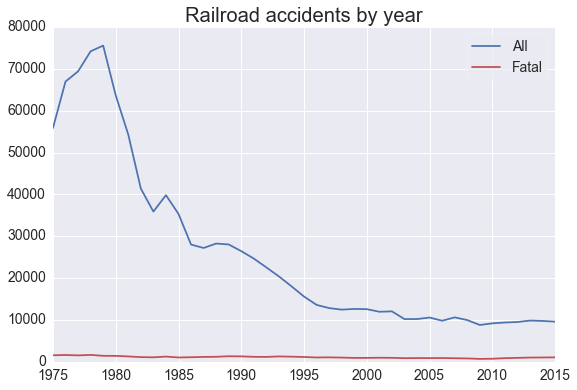

In [7]:
fig, ax = plt.subplots(1)
df['YEAR'].value_counts().sort_index().plot(ax=ax, label='All')
df[df['FATAL']]['YEAR'].value_counts().sort_index().plot(ax=ax, label='Fatal', COLOR=SNS_RED)
ax.legend()
ax.set_title('Railroad accidents by year')

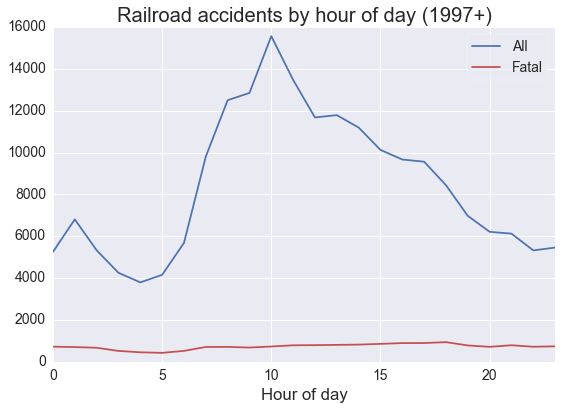

In [11]:
fig, ax = plt.subplots(1)
df['TIME24HR'].value_counts().sort_index().plot(ax=ax, label='All')
df[df['FATAL']]['TIME24HR'].value_counts().sort_index().plot(ax=ax, label='Fatal', COLOR=SNS_RED)
ax.legend()
ax.set_title('Railroad accidents by hour of day (1997+)')
ax.set_xlabel('Hour of day')

### Summarize ALL the things!

Skipping "INCIDENT_NUM" histogram -- most common value is < 1% of all cases


/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


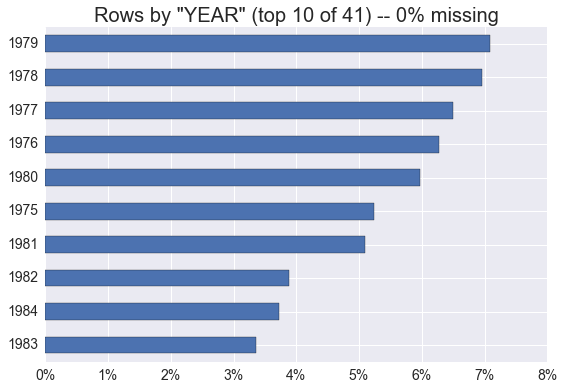

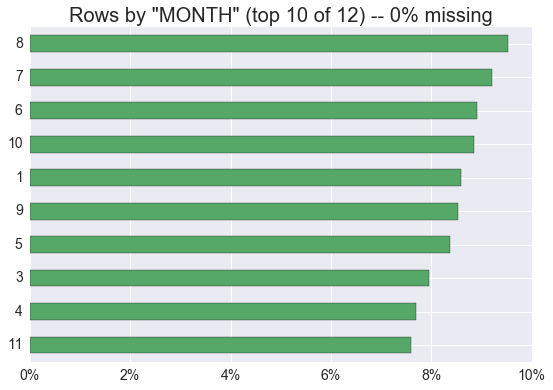

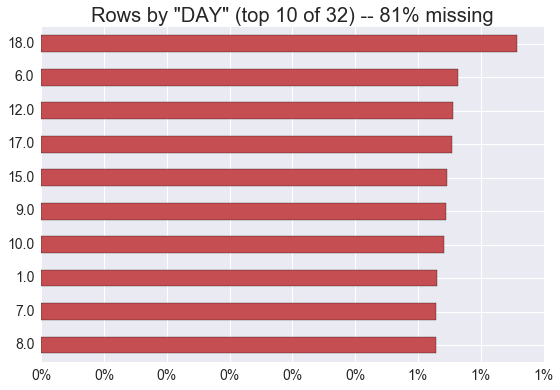

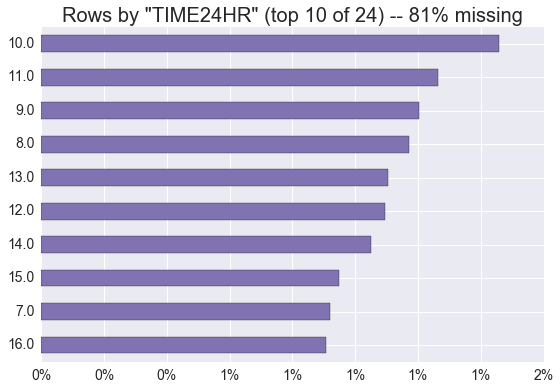

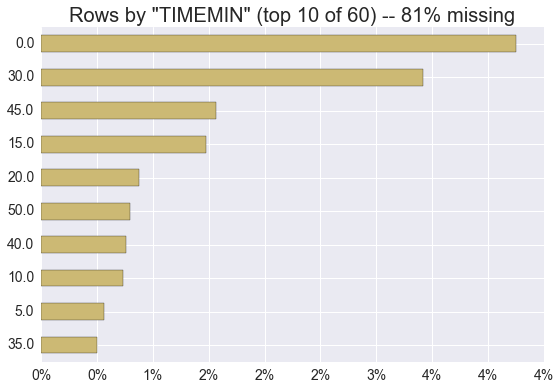

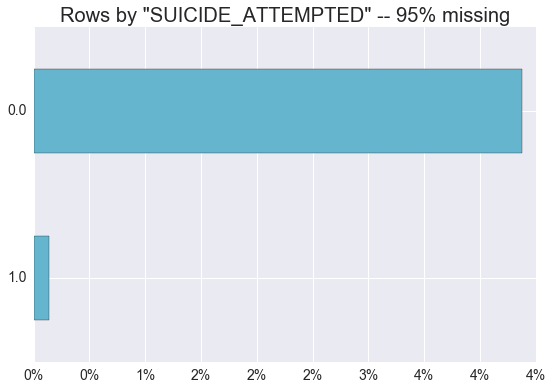

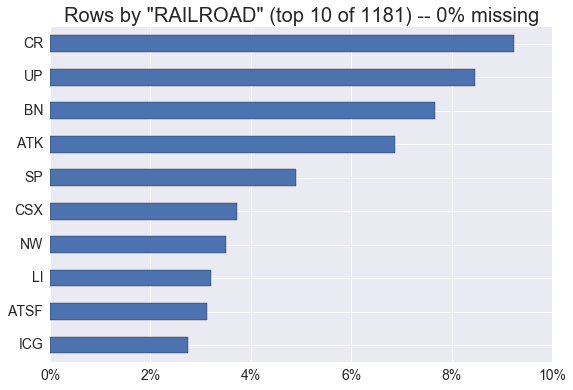

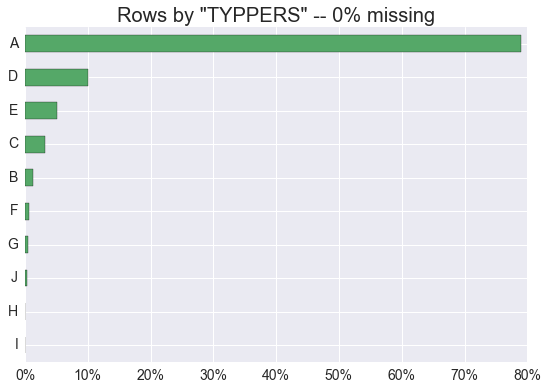

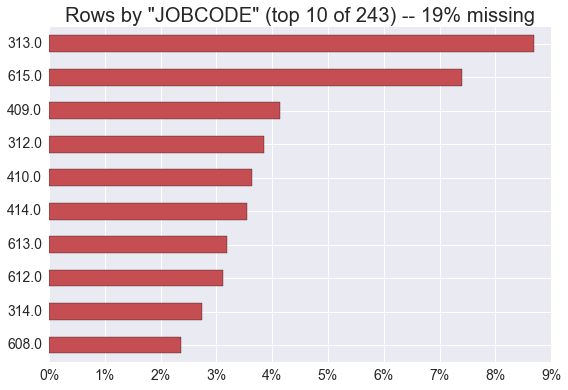

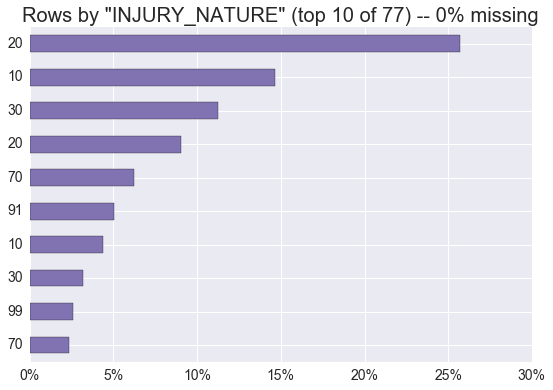

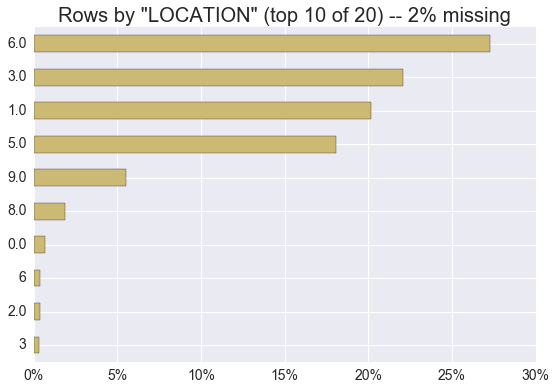

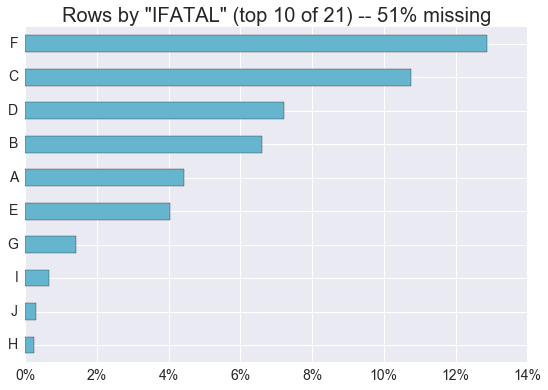

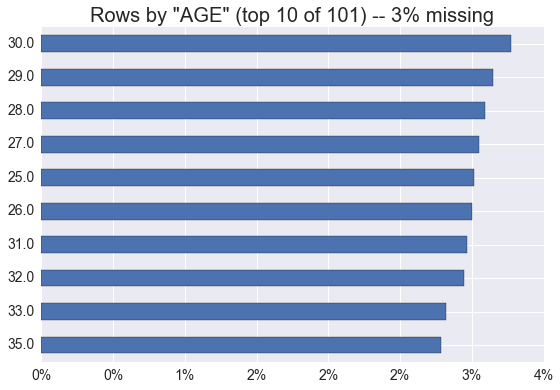

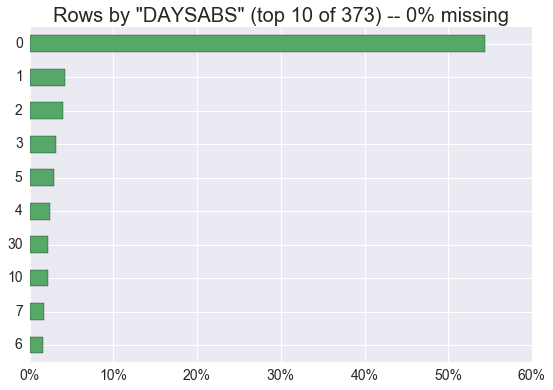

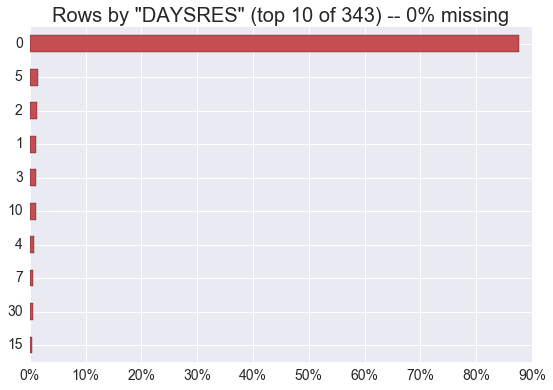

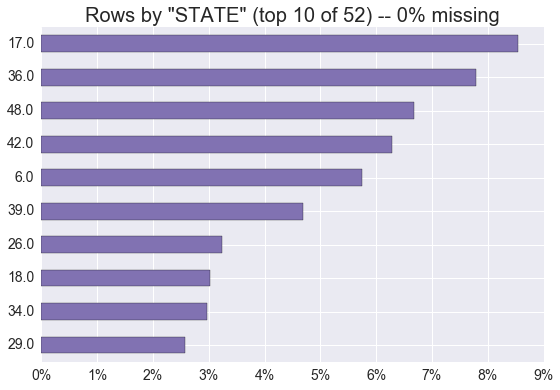

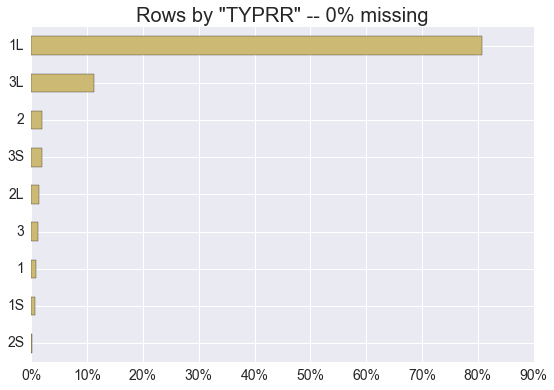

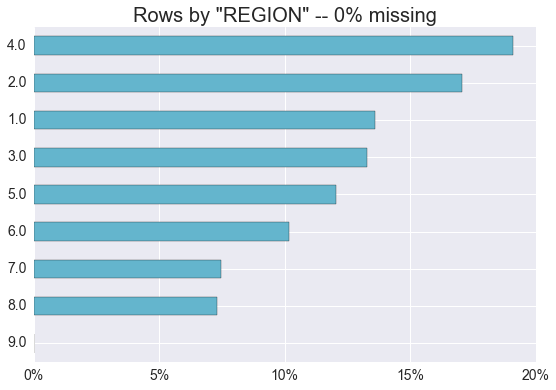

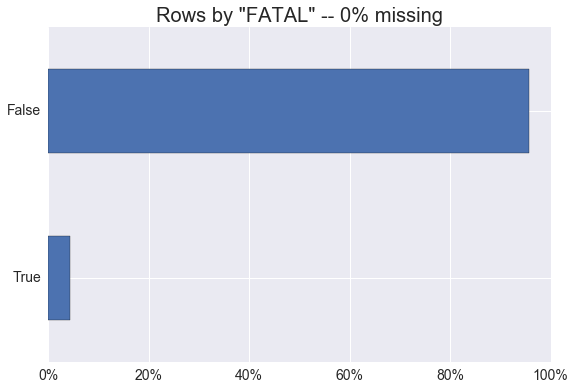

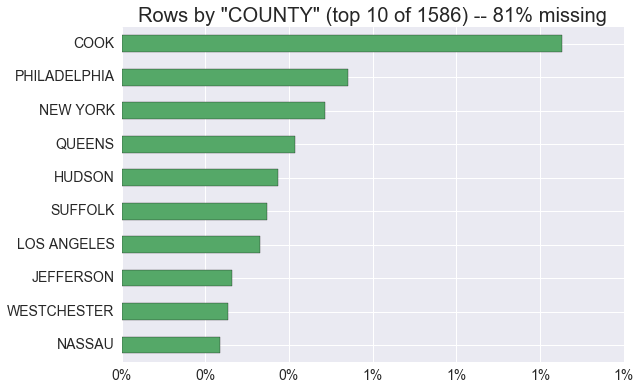

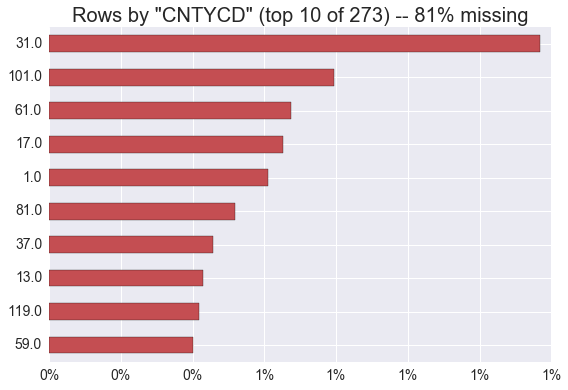

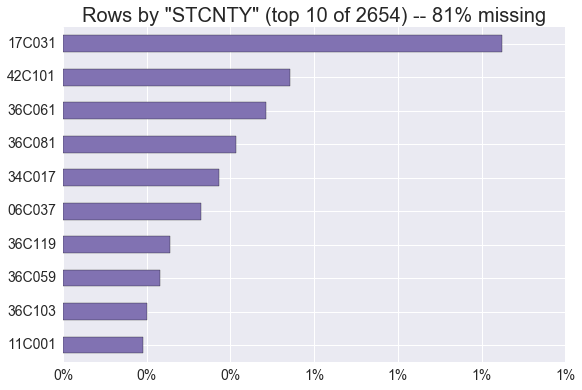

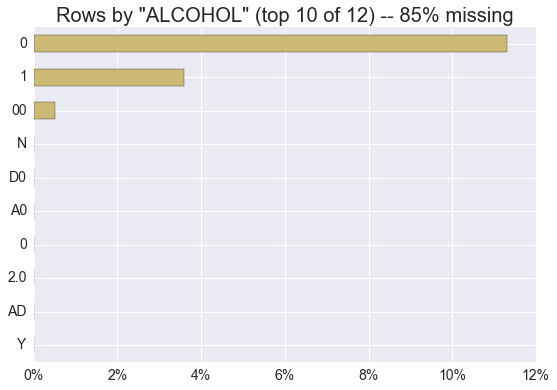

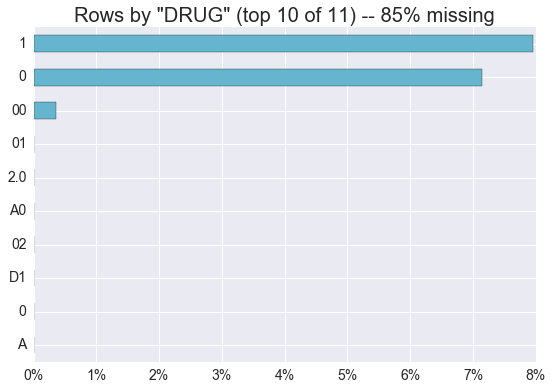

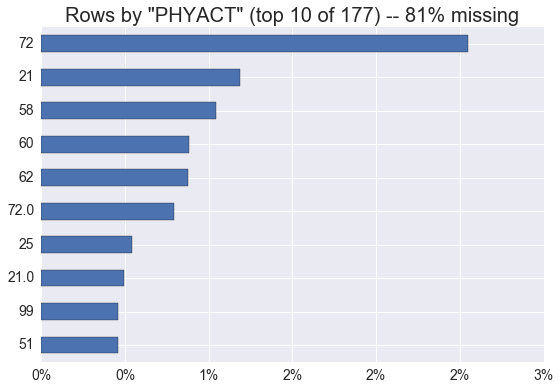

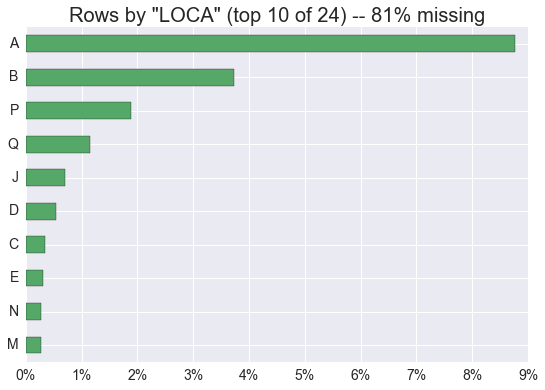

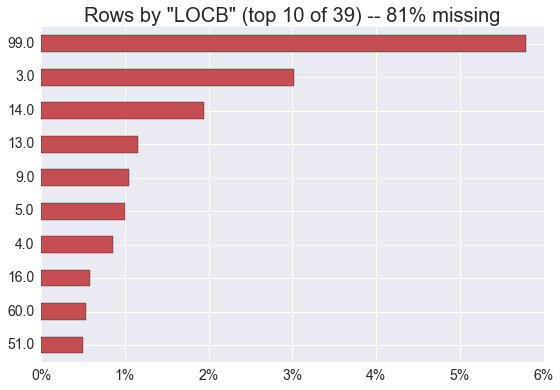

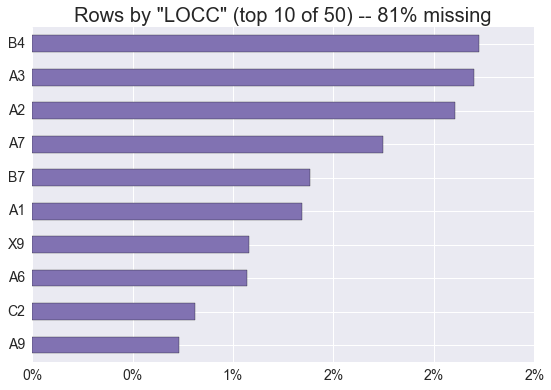

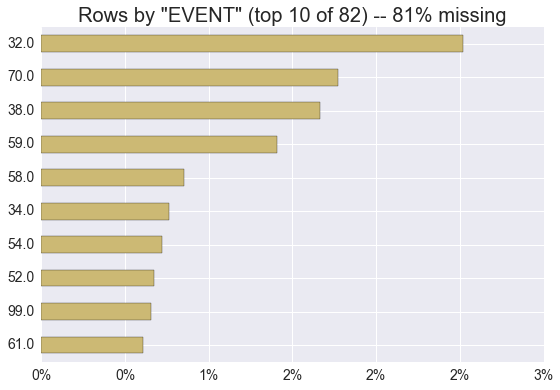

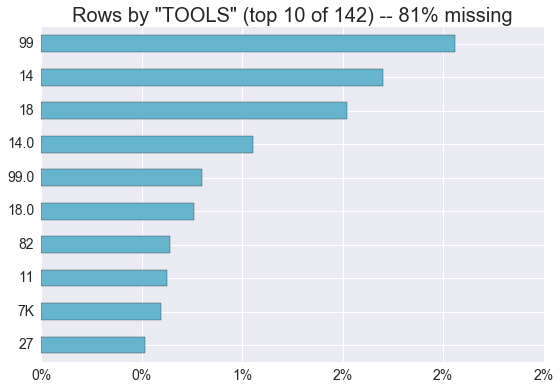

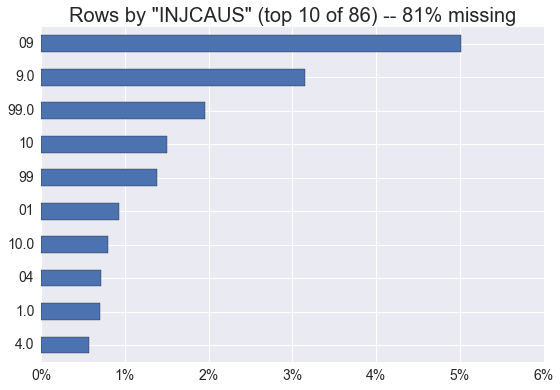

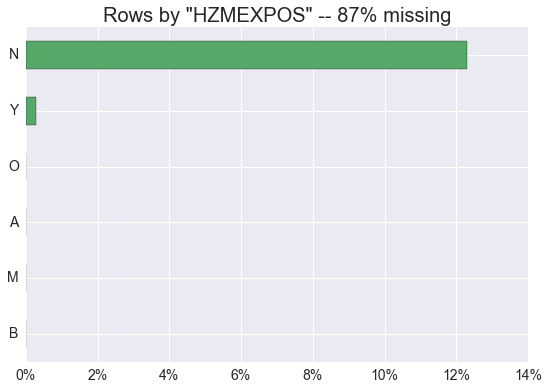

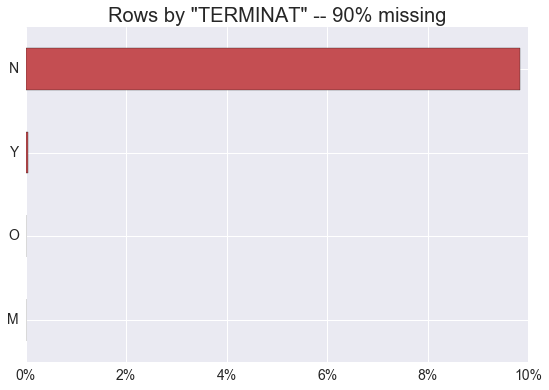

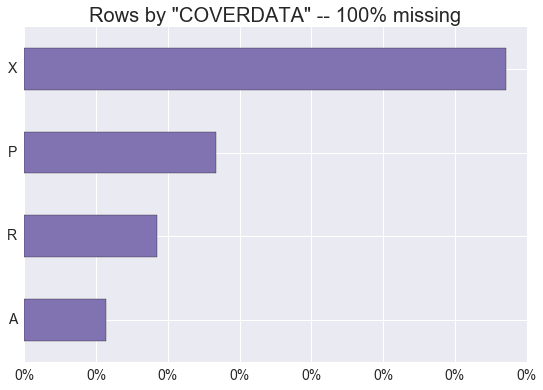

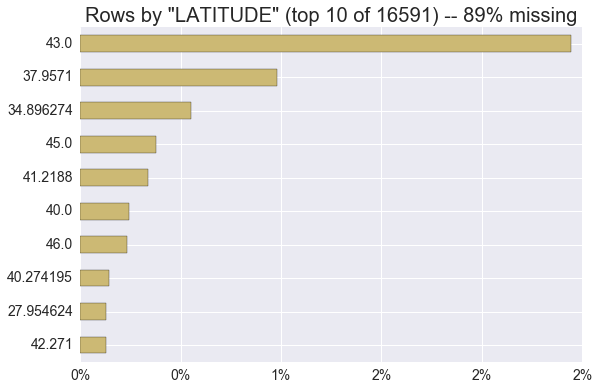

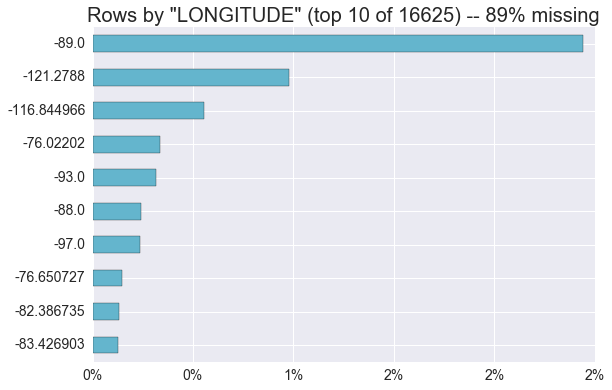

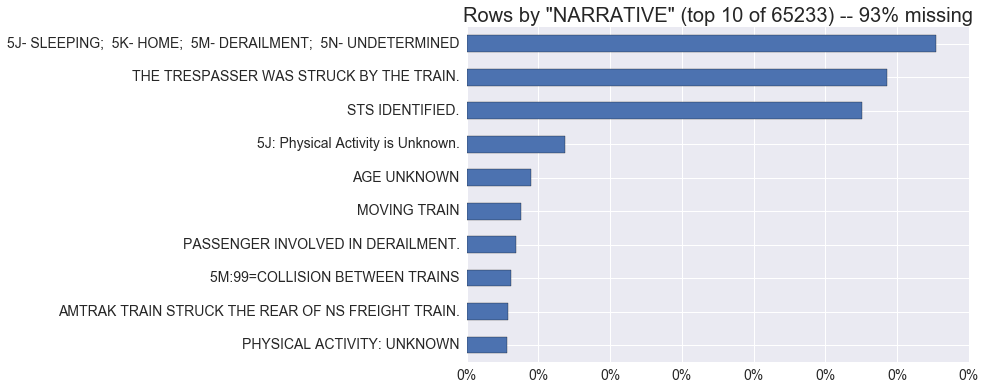

In [12]:
for col in df.columns:
    plot_top_hist(df, col)

In [ ]:
import requests_oauthlib
import requests
import simplejson



oauth_obj = requests_oauthlib.OAuth1(
CONSUMER_KEY,
CONSUMER_SECRET,
TOKEN,
TOKEN_SECRET,
signature_type='auth_header'
)

response = requests.post(
'https://api.yelp.com/v2/click_tracking/',
auth=oauth_obj,
data=simplejson.dumps({
"result_type": "business",
"value": "some-yelp-business-id",
"endpoint_provenance": "checkin_suggest",
"session_id": "some-id"
})
)

In [444]:
def get_search_parameters(lat,lng):
  #See the Yelp API for more details
  params = {}
  params["ll"] = "{},{}".format(str(lat),str(lng))
  params["radius_filter"] = "1600"
  params["limit"] = "10"
  params["term"] = "Psychiatric"
 
  return params

In [445]:
def get_results(params):
 
  #Obtain these from Yelp's manage access page
  consumer_key = "Insert key"
  consumer_secret = "Insert Key"
  token = "Insert Key"
  token_secret = "Insert Key"
   
  session = rauth.OAuth1Session(
    consumer_key = consumer_key
    ,consumer_secret = consumer_secret
    ,access_token = token
    ,access_token_secret = token_secret)
     
  request = session.get("http://api.yelp.com/v2/search",params=params)
   
  #Transforms the JSON API response into a Python dictionary
  data = request.json()
    
  session.close()
  #print data
  return data.get('total')

In [277]:
SUICIDE_ATTEMPTED = df[(df.SUICIDE_ATTEMPTED == 1)] 

In [278]:
SUICIDE_ATTEMPTED['lat_long'] = zip(SUICIDE_ATTEMPTED.LATITUDE, SUICIDE_ATTEMPTED.LONGITUDE)

/Users/deepesch/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [279]:
locs = SUICIDE_ATTEMPTED['lat_long'].values.tolist()

In [ ]:
api_calls = []
for lat,lng in locs:
    params = get_search_parameters(lat,lng)
    api_calls.append(get_results(params))

In [448]:
SUICIDE_ATTEMPTED["psy"] = np.asarray(api_calls)

/Users/deepesch/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [449]:
SUICIDE_ATTEMPTED['lat_long'] = zip(SUICIDE_ATTEMPTED.LATITUDE.round(1), SUICIDE_ATTEMPTED.LONGITUDE.round(1))

/Users/deepesch/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [450]:
SUICIDE_ATTEMPTED['Counts'] = SUICIDE_ATTEMPTED.groupby(['lat_long'])['psy'].transform('count')

/Users/deepesch/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [453]:
cor = SUICIDE_ATTEMPTED[['lat_long','psy','Counts']].sort(columns='psy').drop_duplicates(keep='first')

/Users/deepesch/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [459]:
threshold = 1
value_counts = cor.stack().value_counts() 
to_remove = value_counts[value_counts <= threshold].index
cor.replace(to_remove, np.nan, inplace=True)

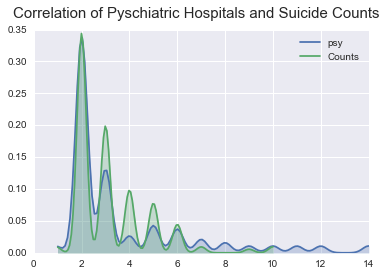

In [498]:
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.kdeplot(cor.psy, shade=True, cut =0, clip=(0,2000))
fig = sns.kdeplot(cor.Counts, shade=True, cut =0, clip=(0,2000))

fig.figure.suptitle("Correlation of Pyschiatric Hospitals and Suicide Counts", fontsize = 15)